In [18]:
import numpy as np
import re
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import cm

In [19]:
from datetime import datetime
import glob
import os
import json
import pickle
import six
sns.set()
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.mode.chained_assignment = None

In [20]:
AllCSV = [i for i in glob.glob('*.{}'.format('csv'))]
AllCSV

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [21]:
#read all the csv files.
'''

for csv in AllCSV:
    df = pd.read_csv(csv)
    df['country'] = csv[0:2] 
    all_df.append(df) 
    
all_df[0].head()
'''
all_df = []
for csv in AllCSV:
    try:
        df = pd.read_csv(csv, encoding='utf-8')
    except UnicodeDecodeError:
        try:
            df = pd.read_csv(csv, encoding='ISO-8859-1')
        except UnicodeDecodeError:
            df = pd.read_csv(csv, encoding='cp1252')

    df['country'] = csv[0:2] #add a new coumn country so that each dataset can be identified in a unique way
    all_df.append(df)

all_df[0].head() #index 0-9 for [CA, DE, FR, GB, IN, JP, KR, MX, RU, US] datasets







,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [22]:
#Fix the datatypes
all_df[1].dtypes

video_id                  object
trending_date             object
title                     object
channel_title             object
category_id                int64
publish_time              object
tags                      object
views                      int64
likes                      int64
dislikes                   int64
comment_count              int64
thumbnail_link            object
comments_disabled           bool
ratings_disabled            bool
video_error_or_removed      bool
description               object
country                   object
dtype: object

In [23]:
import pandas as pd

for df in all_df:
    if 'video_id' in df.columns:
        df['video_id'] = df['video_id'].astype('str')
    if 'trending_date' in df.columns:
        df['trending_date'] = df['trending_date'].astype('str')
        date_pieces = df['trending_date'].str.split('.')
        df['Year'] = date_pieces.str[0].astype(int)
        df['Day'] = date_pieces.str[1].astype(int)
        df['Month'] = date_pieces.str[2].astype(int)

        updatedyear = []
        for i in range(len(df)):
            y = df.loc[i, "Year"]
            newy = y + 2000
            updatedyear.append(newy)

        for i in range(len(df)):
            newy = updatedyear[i]
            tr = df.loc[i, "Year"]
            df['Year'].replace(to_replace=tr, value=newy, inplace=True)

        del df['trending_date']
        df['trending_date'] = pd.to_datetime(df[['Year', 'Month', 'Day']], format="%Y-%m-%d")
        del df['Year']
        del df['Month']
        del df['Day']

# Now you can continue processing your data


In [24]:
df['title'] = df['title'].astype('str')
df['channel_title'] = df['channel_title'].astype('str')
df['category_id'] = df['category_id'].astype('str') 
df['tags'] = df['tags'].astype('str')
df['thumbnail_link'] = df['thumbnail_link'].astype('str') 
df['description'] = df['description'].astype('str')

#Change from Boolean to Categorical
df['comments_disabled'] = df['comments_disabled'].astype('category') 
df['ratings_disabled'] = df['ratings_disabled'].astype('category') 
df['video_error_or_removed'] = df['video_error_or_removed'].astype('category') 
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')
    

In [26]:
import pandas as pd

for df in all_df:
    if 'publish_time' in df.columns:
        # Convert 'publish_time' to datetime if it's not already
        df['publish_time'] = pd.to_datetime(df['publish_time'])
        # Insert 'publish_date' as a new column
        df.insert(4, 'publish_date', df['publish_time'].dt.date)
        # Modify 'publish_time' column to contain only the time
        df['publish_time'] = df['publish_time'].dt.time

# Now that 'publish_time' has been properly converted to datetime, you can convert 'publish_date'
for df in all_df:
    if 'publish_date' in df.columns:
        df['publish_date'] = pd.to_datetime(df['publish_date'], format="%Y-%m-%d")


In [32]:
all_df[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                        int64
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [33]:
#If the datatypes are not changed, it could be due to missing values, try to use if clause
import pandas as pd

for df in all_df:
    # Check if the columns exist in the DataFrame before changing their data types
    if 'category_id' in df.columns:
        df['category_id'] = df['category_id'].astype('str')
    
    if 'comments_disabled' in df.columns:
        df['comments_disabled'] = df['comments_disabled'].astype('category')
    
    if 'ratings_disabled' in df.columns:
        df['ratings_disabled'] = df['ratings_disabled'].astype('category')
    
    if 'video_error_or_removed' in df.columns:
        df['video_error_or_removed'] = df['video_error_or_removed'].astype('category')


In [34]:
all_df[1].dtypes

video_id                          object
title                             object
channel_title                     object
category_id                       object
publish_date              datetime64[ns]
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
trending_date             datetime64[ns]
dtype: object

In [35]:
#For the index, we chose video_id
for df in all_df:
    df.set_index('video_id', inplace=True)

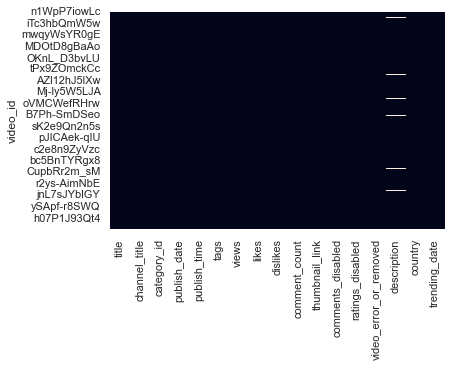

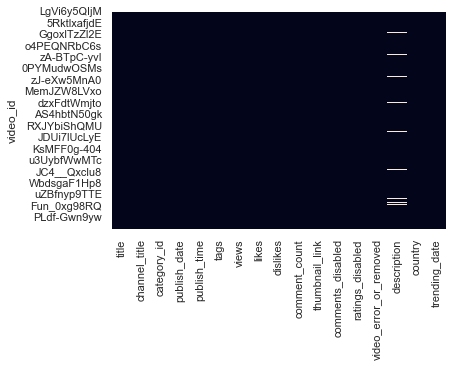

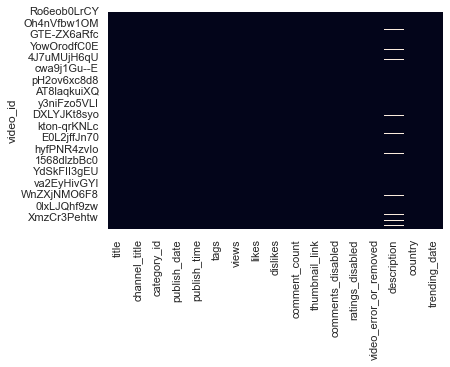

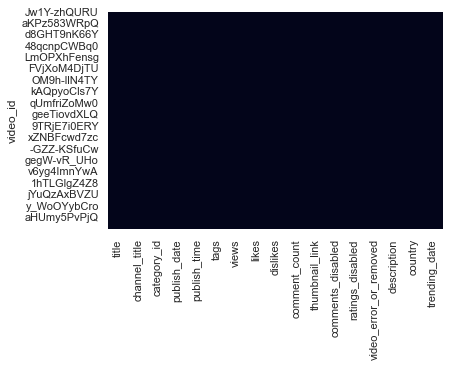

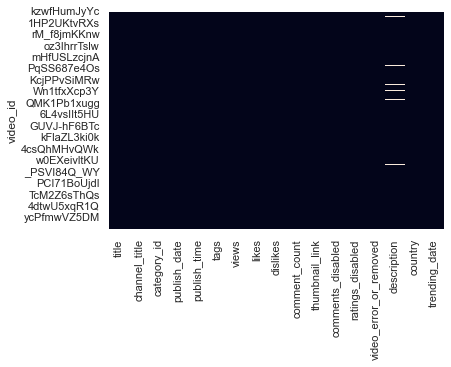

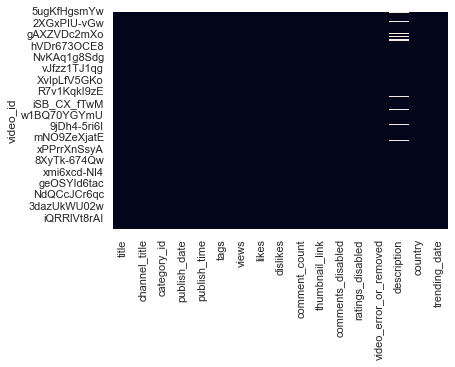

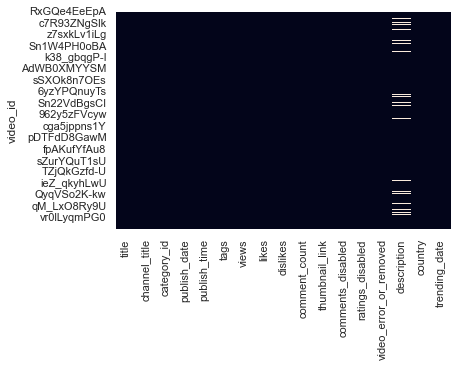

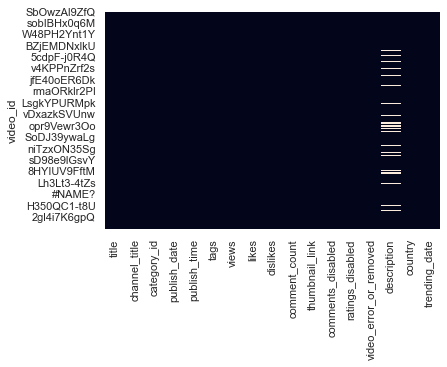

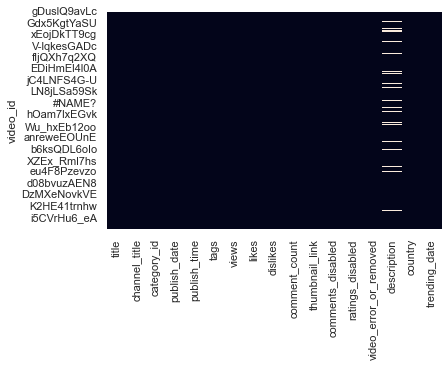

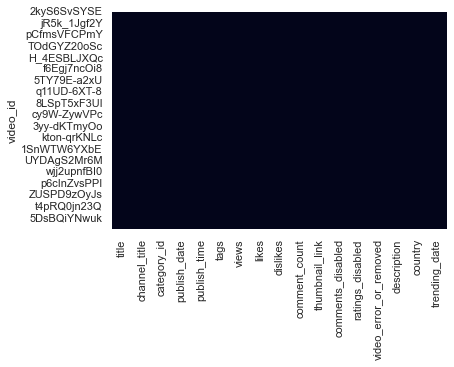

<Figure size 432x288 with 0 Axes>

In [36]:
#Finding missing values
for df in all_df:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [37]:
#remove null values
for df in all_df:
    df.dropna(inplace=True)




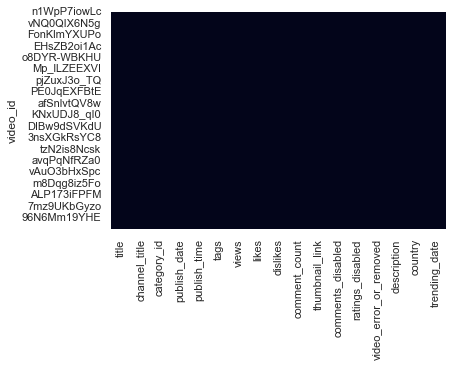

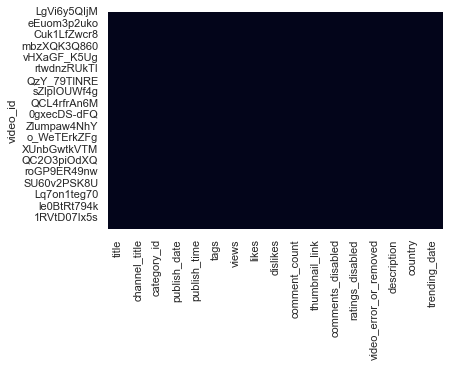

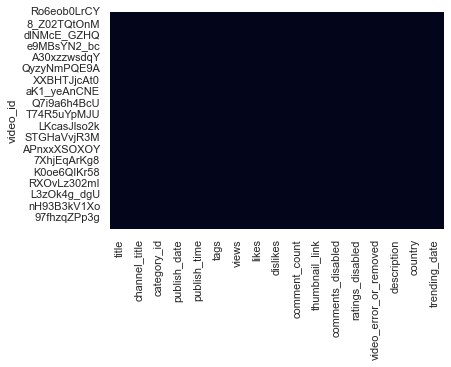

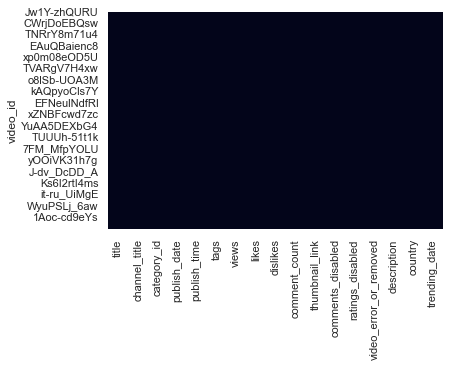

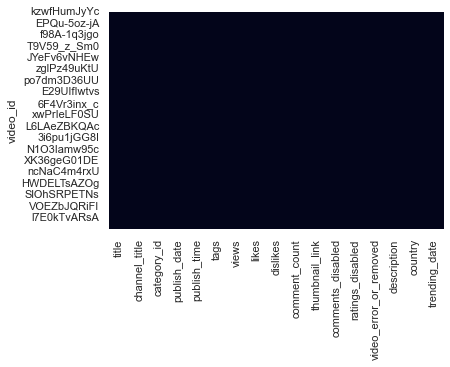

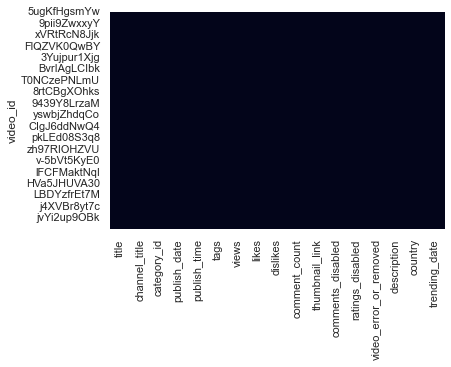

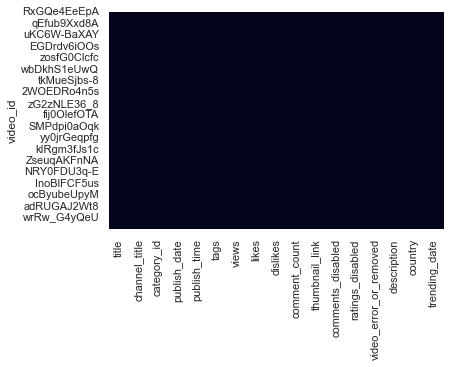

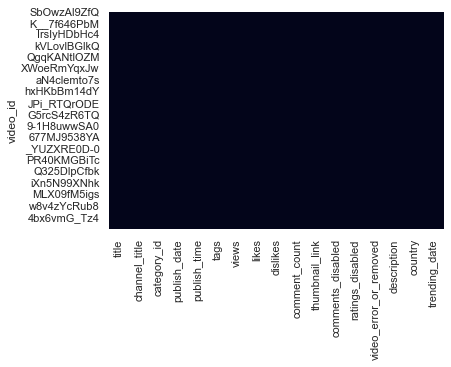

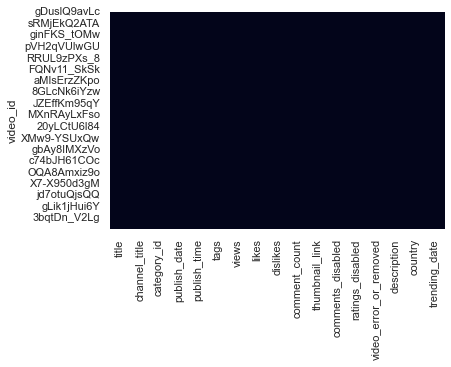

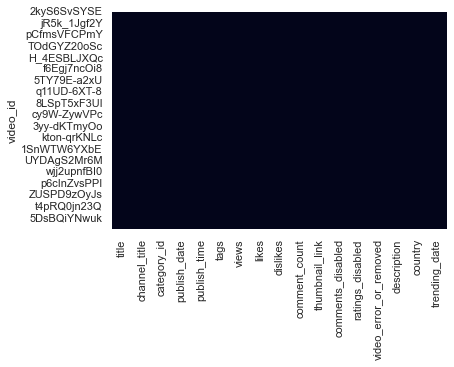

<Figure size 432x288 with 0 Axes>

In [38]:
#Finding missing values
for df in all_df:
    sns.heatmap(df.isnull(), cbar=False)
    plt.figure()

In [39]:
#combine all df into one
combined_df = pd.concat(all_df)

now to further clean and refine the data by sorting the entries of the data set by trending_date. 
This would result in the latest trending videos to be moved to the top of the data set. 
This was done so that we can view the current trends of the trending videos of each country,
as they are more relevant to our project.

Before doing so, create a duplicate copy of our data frame as a safety precaution and to keep a
copy of the original data frame at hand as we also decided to remove any duplicate video entries
while sorting the videos from the other data frame.

In [40]:
#Make a copy
backup_df = combined_df.reset_index().sort_values('trending_date', ascending=False).set_index('video_id')

In [42]:
combined_df.head(5)

,title,channel_title,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-14
0dBIkQ4Mz1M,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-14
5qpjK5DgCt4,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,2017-11-14
d380meD0W0M,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-14
2Vv-BfVoq4g,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,2017-11-14


In [46]:
#Sort according to latest trending date while removing dups
combined_df = combined_df.reset_index().sort_values('trending_date',
                                                   ascending= False).drop_duplicates('video_id',
                                                                                     keep='first').set_index('video_id')

In [47]:
#Doing the same for each dfs
for df in all_df:
    df = df.reset_index().sort_values('trending_date',
                                     ascending=False).set_index('video_id')

In [48]:
#Print the results
combined_df[['publish_date','publish_time','trending_date','country']].head()

,publish_date,publish_time,trending_date,country
video_id,,,,
ooyjaVdt-jA,2018-05-17,17:09:38,2018-06-14,US
4cRanIowkTE,2018-06-13,14:00:02,2018-06-14,JP
LPr_UZkmVn8,2018-06-12,08:00:00,2018-06-14,JP
KZ1dRqT8y-k,2018-06-13,09:30:01,2018-06-14,JP
cgjoJEDtBj4,2018-06-13,10:00:08,2018-06-14,JP


#Inserting Category Column
One of our final steps for the data cleaning of the data sets was checking the JSON files
that were available with the data sets. We needed to see whether or not these files contained
any useful data. As there were multiple files, we decided to read two files at random, 
in order to check whether they contained the same data or were they all containing different data.

In [49]:
#read file
with open('US_category_id.json', 'r') as f:
    data = f.read()
#parse the file
obj = json.loads(data)
obj

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

One of the other randomly selected JSON file had similar data. Each of the JSON file contains id
ranging from 1 to 44 (both inclusive). And with each id is given its category and other information
related to title, kind etc. Hence, we can use any one of the JSON files to map category to category
id in our data frame.

In [51]:
category_id = {}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']
        
combined_df.insert(2, 'category', combined_df['category_id'].map(category_id))
backup_df.insert(2, 'category', backup_df['category_id'].map(category_id))

for df in all_df:
    df.insert(2, 'category', df['category_id'].map(category_id))
    



ValueError: cannot insert category, already exists

In [52]:
combined_df.head(5)

,title,channel_title,category,category_id,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,trending_date
video_id,,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,20,2018-05-17,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-06-14
4cRanIowkTE,å FBIã¨ã¼ã¸ã§ã³ããæããã200ï¼ ä...,ãã©ã¤ããµã¤ã | Bright Side Japan,Howto & Style,26,2018-06-13,14:00:02,"äººã ãé­ äºããæ¹æ³|""é­ åçã«ãªã...",39235,1194,27,46,https://i.ytimg.com/vi/4cRanIowkTE/default.jpg,False,False,False,å FBIã¨ã¼ã¸ã§ã³ããã¸ã£ãã¯ï½¥ã·ã...,JP,2018-06-14
LPr_UZkmVn8,DA PUMP / U.S.A. Dance -Mirror ver.-,avex,Music,10,2018-06-12,08:00:00,"DA PUMP|""U.S.A.""|""ISSA""|""ï¼å¹´åã¶ã""|""ã¦...",630714,10289,807,1209,https://i.ytimg.com/vi/LPr_UZkmVn8/default.jpg,False,False,False,DA PUMPè©±é¡ã®æ°æ²ãU.S.A.ãDance -Mirro...,JP,2018-06-14
KZ1dRqT8y-k,ãã¢ããã¯ã®æ¥µã¿ï¼ãä¸­ç®é»å¥³å­ã...,EveEve in éåº§ - å¤§äººã®ææãµãã¼ã...,Entertainment,24,2018-06-13,09:30:01,"ã¤ã´ã¤ã´|""eveeve""|""EveEve""|""ã¤ãã¤ã""|...",44406,150,14,40,https://i.ytimg.com/vi/KZ1dRqT8y-k/default.jpg,False,False,False,ãã£ã³ãã«ç»é²ã¯ãã¡ãâhttp://urx...,JP,2018-06-14
cgjoJEDtBj4,ãBeat Saberãä¸çã©ã³ã­ã³ã°100ä½ä»¥...,ãããã·ã¹ã¿ã¼ãº [Î© Sisters],Gaming,20,2018-06-13,10:00:08,"animation|""ããã·ã¹""|""ãããã·ã¹ã¿ã...",25818,2914,7,596,https://i.ytimg.com/vi/cgjoJEDtBj4/default.jpg,False,False,False,ãããã£ã¦ãã¼ï¼ï¼ä»æ¥ã¯Beat Saber...,JP,2018-06-14


In [53]:
combined_df['category'].unique()

array(['Gaming', 'Howto & Style', 'Music', 'Entertainment',
       'Pets & Animals', 'News & Politics', 'Sports', 'People & Blogs',
       'Comedy', 'Education', 'Film & Animation', nan, 'Travel & Events',
       'Shows', 'Autos & Vehicles', 'Science & Technology', 'Movies',
       'Trailers'], dtype=object)

In [54]:
#Exploratory Data Analysis
#Ratio of likes-dislikes in different categories
# calculating total likes for each category
likesdf = combined_df.groupby('category')['likes'].agg('sum')

In [55]:
likesdf

category
Autos & Vehicles         25344595
Comedy                  216974804
Education                21549994
Entertainment           468438065
Film & Animation         63095410
Gaming                   62356740
Howto & Style            77000468
Movies                      83781
Music                   443456723
News & Politics          51112115
People & Blogs          150841355
Pets & Animals           11213802
Science & Technology     51466839
Shows                     1244205
Sports                   69982271
Trailers                      141
Travel & Events           4251270
Name: likes, dtype: int64

In [56]:
# calculating total dislikes for each category
dislikesdf = combined_df.groupby('category')['dislikes'].agg('sum')
# calculating ratios of likes to dislikes
ratiodf = likesdf/dislikesdf 
# most liked category to appear on top
ratiodf = ratiodf.sort_values(ascending=False).reset_index()

<AxesSubplot:xlabel='ratio', ylabel='category'>

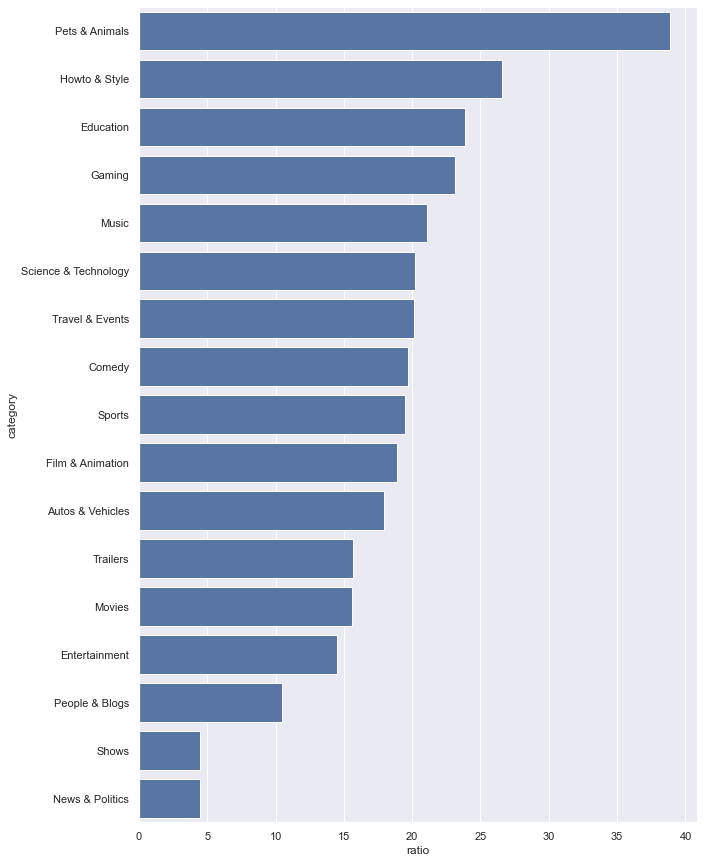

In [57]:
#plot bar chart
ratiodf.columns = ['category', 'ratio']
plt.subplots(figsize=(10, 15))
sns.barplot(x='ratio', y='category', data= ratiodf, label='Likes=Dislikes ratio', color='b')

#Observations
We see that videos belonging to the pets and animals categories have the highest ratio
of likes to dislikes videos among the trending categories whereas new and politics videos
have the least. From this we can infer that people are less divided on the content of videos
based on entertainment than compared to topics such as new, whose content can lead to a division
of opinions among the user.

Users like videos from which category more?
Next, we moved on to observe which categories were more preferred by the users,
based on the likes on the videos in each category. Three of the outputs were randomly
selected from the ten plotted graphs and results are as follows:

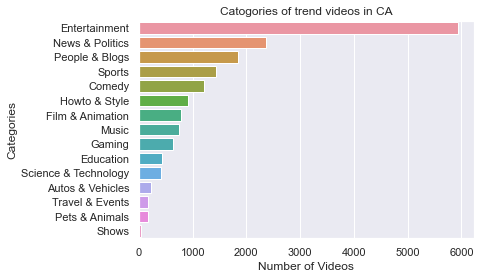

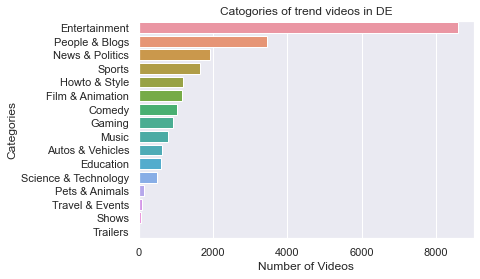

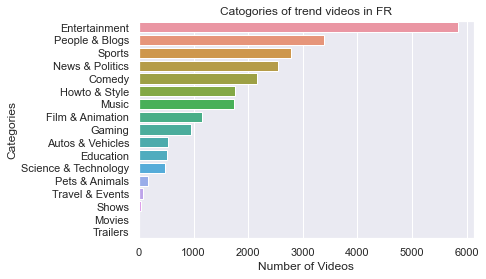

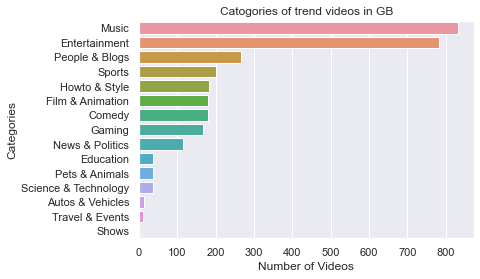

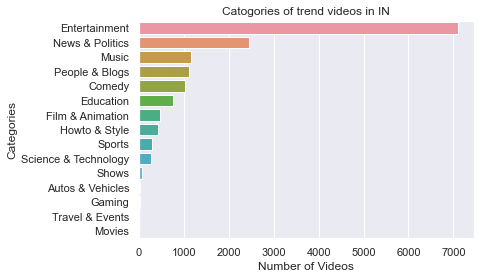

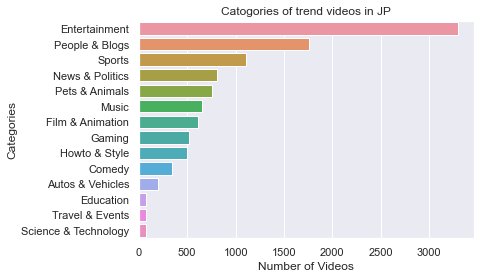

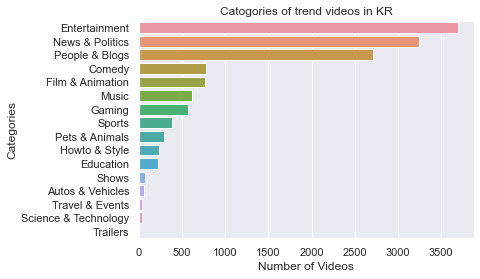

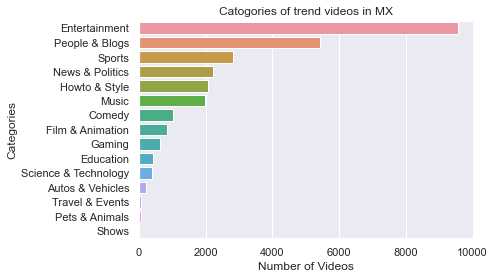

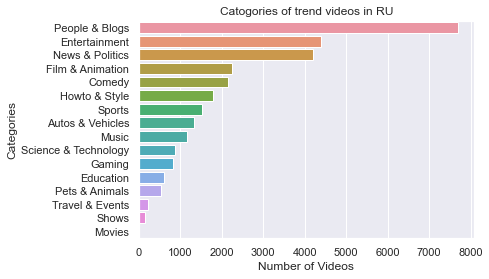

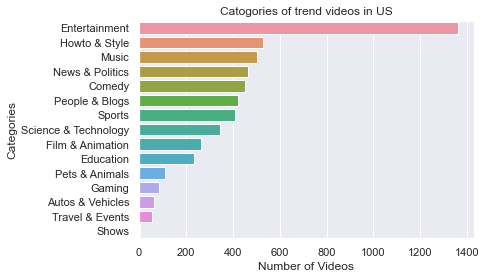

In [59]:
#Gelling names of all countries
countries= []
allcsv = [i for i in glob.glob('*.{}'.format('csv'))]
for csv in allcsv:
    c = csv[0:2]
    countries.append(c)

for country in countries:
    if country == 'US':
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
    else:
        tempdf = combined_df[combined_df['country']==country]['category'].value_counts().reset_index()
        ax = sns.barplot(y=tempdf['index'], x=tempdf['category'], data=tempdf, orient='h')
        plt.xlabel("Number of Videos")
        plt.ylabel("Categories")
        plt.title("Catogories of trend videos in " + country)
        plt.figure()


Apart from RU and GB, category most liked by the users in each of the other countries is ‘Entertainment’.

Viewers from RU prefer the category ‘People and Blogs’ the most.

Viewers from GB prefer the category ‘Music’ the most.

Categories ‘Shows’, ‘Movies’, and ‘Trailers’ were the least liked ones in almost all of the countries.

Top 5 videos that are on trending in each country?
Now, as we know the most preferred category from user in each country, we decided to see what were
the top 5 videos on the trending page from each country. As done earlier, we selected 3 random results out of a total of 10 results to be displayed.

In [61]:
temporary= []
for df in all_df:
    temp = df
    temp = temp.reset_index().sort_values(by=['views'], ascending=False)
    temp.drop_duplicates(subset='video_id',keep='first', inplace=True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5)
    temporary.append(temp)
    
# Printing 3 randomly selected countries
temporary[2][['title', 'channel_title', 'category', 'views', 'likes']]
    

,title,channel_title,category,views,likes
video_id,,,,,
FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,Entertainment,100911567,2656682
7C2z4GqqS5E,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,Music,65396157,4750254
VYOjWnS4cMY,Childish Gambino - This Is America (Official V...,ChildishGambinoVEVO,Music,60776509,2183745
TyHvyGVs42U,"Luis Fonsi, Demi Lovato - Échame La Culpa",LuisFonsiVEVO,Music,47078714,1763400
BhIEIO0vaBE,To Our Daughter,Kylie Jenner,People & Blogs,44818108,0


In [62]:
#Is the most liked video also the most trending video?
temporary = [] # to store results for each country
for df in all_df:
    temp = df
    temp = temp.reset_index().sort_values(by = ['likes'], ascending=False)
    temp.drop_duplicates(subset ="video_id", keep = 'first', inplace = True)
    temp.set_index('video_id', inplace=True)
    temp = temp.head(5) # top 5 that are most liked
    temporary.append(temp)
# Printing 3 randomly selected results
temporary[0][['views', 'likes']]

,views,likes
video_id,,
7C2z4GqqS5E,80738011,5053338
VYOjWnS4cMY,98938809,3037318
FlsCjmMhFmw,137843120,3014479
6ZfuNTqbHE8,89930713,2606665
kTlv5_Bs8aw,27670973,2542863


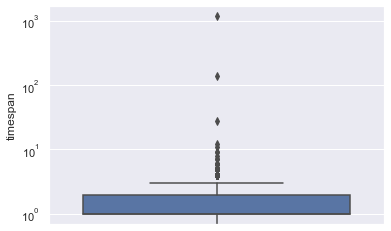

C:\Users\rfroo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


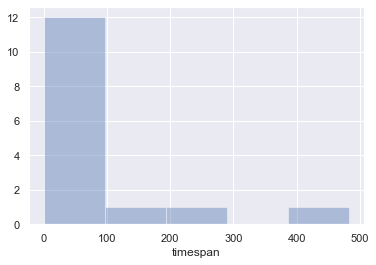

In [63]:
#Maximum number of days to trending status for a video?
# Calculating days between publish and trending date
temporary = []
for data in all_df:
    temp = data
    temp['timespan'] = (temp['trending_date'] - temp['publish_date']).dt.days
    temporary.append(temp)
# Plotting
to_trending = temporary[0].sample(1000).groupby('video_id').timespan.max() # CA
sns_ax = sns.boxplot(y = to_trending)
_ = sns_ax.set(yscale = "log")
plt.show()
_ = sns.distplot(to_trending.value_counts(),bins='rice',kde=False)

As we can see from both plots above, most videos take less a 100 days to reach the trending page. This can be attributed to viral natural of content on the internet, that if some online content is popular, it will often be shared and viewed within it’s short time span of relevancy.

In [64]:
#Users like videos from which category more?
temp = combined_df
temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by='likes', ascending=False).head()
temp

C:\Users\rfroo\AppData\Local\Temp/ipykernel_21820/2811263269.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes'].apply(lambda x: x.astype(int).sum())


,views,likes
category,,
Entertainment,17267252757,468438065
Music,18125985373,443456723
Comedy,4518216463,216974804
People & Blogs,5132978050,150841355
Howto & Style,2205334809,77000468


As we can see, most liked category is ‘Entertainment’ for all countries. This shows user preference to use YouTube as an entertainment platform.

In [66]:
#Users comment on which category the most?
temp = combined_df
temp = temp.groupby('category')['views', 'likes', 'comment_count'].apply(lambda x: x.astype(int).sum())
temp = temp.sort_values(by = 'comment_count', ascending=False).head()
temp

C:\Users\rfroo\AppData\Local\Temp/ipykernel_21820/1915190205.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  temp = temp.groupby('category')['views', 'likes', 'comment_count'].apply(lambda x: x.astype(int).sum())


,views,likes,comment_count
category,,,
Entertainment,17267252757,468438065,67548854
Music,18125985373,443456723,36078640
People & Blogs,5132978050,150841355,23255812
Comedy,4518216463,216974804,22932461
News & Politics,3286301629,51112115,14278576


In [70]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [74]:
#Correlation between views, likes, dislikes, and comments
#Next, we decided to see whether or there was any correlation between views, likes, dislikes, and comments.
col = ['views', 'likes', 'dislikes', 'comment_count']
corr = combined_df[col].corr()
corr


,views,likes,dislikes,comment_count
views,1.000000,0.768424,0.390772,0.431468
likes,0.768424,1.000000,0.447796,0.714831
dislikes,0.390772,0.447796,1.000000,0.642083
comment_count,0.431468,0.714831,0.642083,1.000000


We can see from the results, there is a positive relation between views and likes, likes and comment_count, dislikes and comment_count. We came to this conclusion as anytime the correlation coefficient, denoted as corr, is greater than zero, it’s a positive relationship.